In [ ]:
!pip show tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy*100}%")

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1566 - accuracy: 0.9529 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0351 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0369 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0366 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0317 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0303 -

313/313 [==============================] - 2s 5ms/step


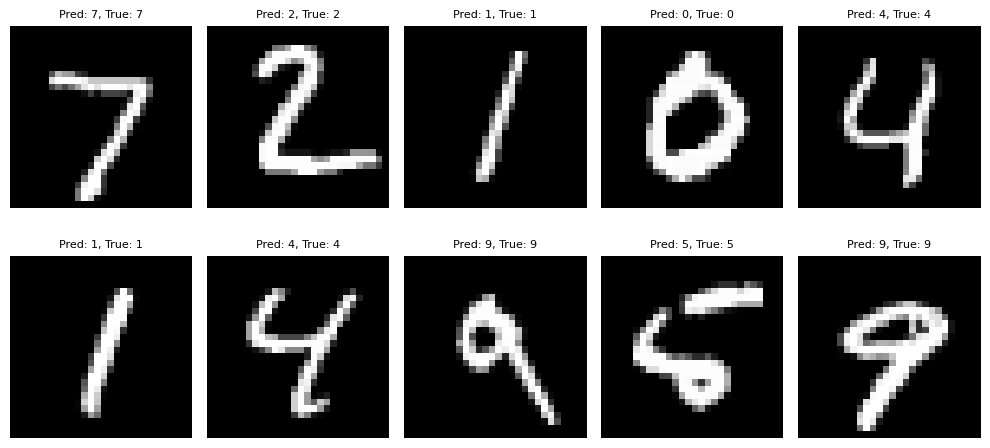

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to label indexes
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to label indexes for comparison
true_labels = np.argmax(test_labels, axis=1)

# Display some test images with their predicted and actual labels
num_rows, num_cols = 2, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2.5*num_rows))

for i in range(num_rows * num_cols):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(test_images[i].reshape(28,28), cmap='gray')

    # Move title to a different position or use ax.text()
    ax.set_title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}", fontsize=8)

    ax.axis('off')

plt.tight_layout()
plt.show()

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1568 - accuracy: 0.9528 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0487 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0352 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0344 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0372 -

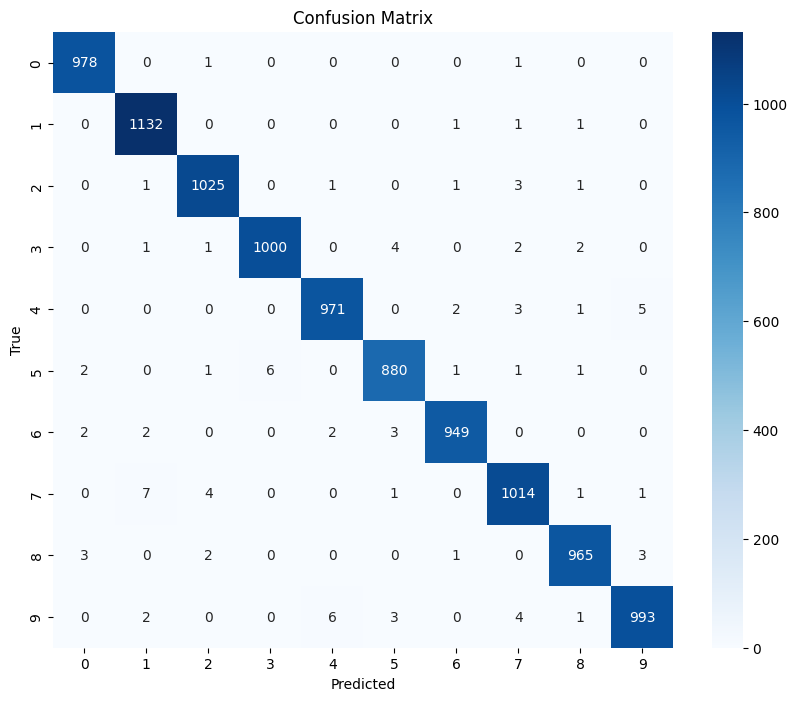

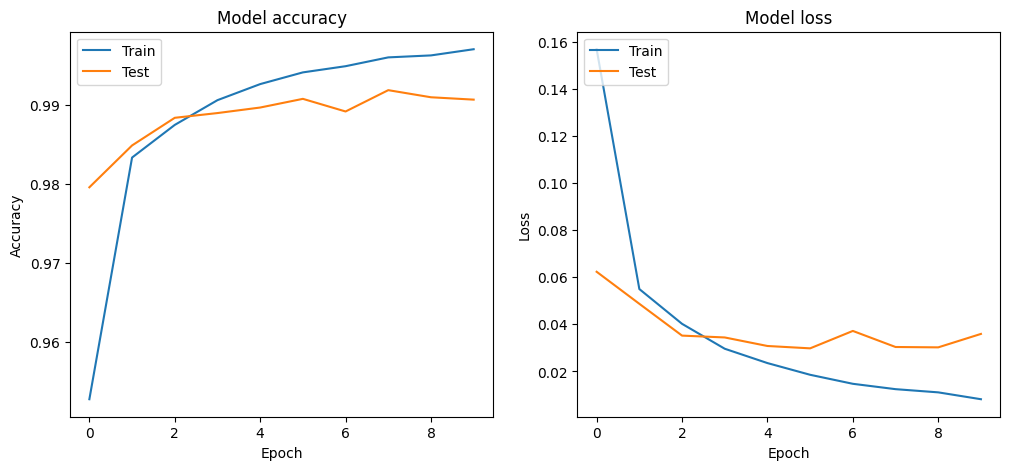

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plotting Training/Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
